In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/dataset.csv')
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

In [ ]:
df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')
df = df.sort_values('Timestamp').reset_index(drop=True)

In [ ]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00


In [ ]:
df=df.drop(columns=['LastUpdatedDate','LastUpdatedTime'])

In [ ]:
df.groupby('Capacity')['SystemCodeNumber'].value_counts()

,,count
Capacity,SystemCodeNumber,
387,BHMBCCTHL01,1312
470,BHMEURBRD01,1312
485,BHMNCPNST01,1312
577,BHMBCCMKT01,1312
687,BHMMBMMBX01,1312
690,Broad Street,1312
1200,BHMNCPHST01,1312
1322,Others-CCCPS8,1312
1920,Shopping,1312


In [ ]:
num_cols=['Latitude','Longitude','Occupancy']
cat_cols=['VehicleType', 'TrafficConditionNearby','QueueLength','IsSpecialDay']

In [ ]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay,Timestamp
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915,2016-11-11 10:22:39.283536640
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000,2016-10-04 07:59:00
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000,2016-10-24 09:48:45
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000,2016-11-11 11:43:30
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000,2016-11-29 13:36:15
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000,2016-12-19 16:30:00
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975,NaN


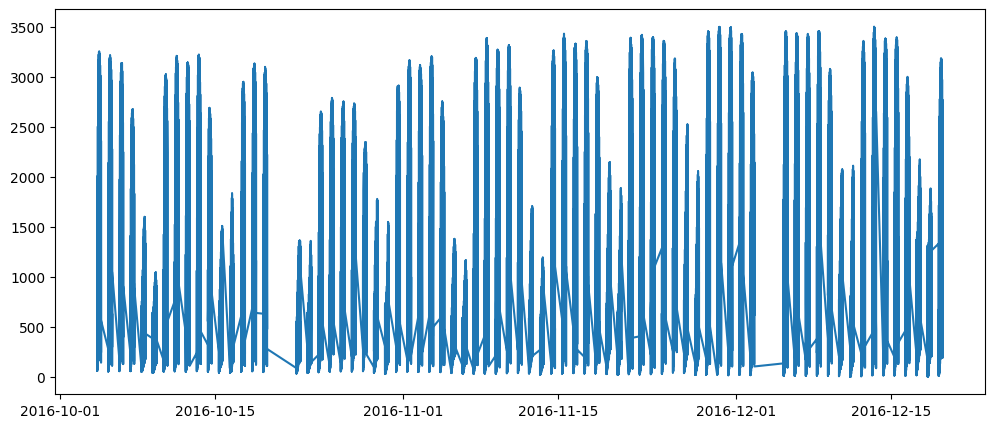

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'],df['Occupancy'])
plt.show()

In [ ]:
df['TrafficConditionNearby'].value_counts()

,count
TrafficConditionNearby,
low,7793
average,6438
high,4137


In [ ]:
df['VehicleType'].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [ ]:
df['VehicleType_Enc']=df['VehicleType'].replace({'car':1,'bike':0.75,'truck':2,'cycle':0.5})
df['TrafficConditionNearby_Enc']=df['TrafficConditionNearby'].replace({'low':0.5,'average':0.75,'high':1})

/tmp/ipython-input-13-1018434425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VehicleType_Enc']=df['VehicleType'].replace({'car':1,'bike':0.75,'truck':2,'cycle':0.5})
/tmp/ipython-input-13-1018434425.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TrafficConditionNearby_Enc']=df['TrafficConditionNearby'].replace({'low':0.5,'average':0.75,'high':1})


In [ ]:
df['Weekday'] = pd.to_datetime(df['Timestamp']).dt.weekday

In [ ]:
df.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,Timestamp,VehicleType_Enc,TrafficConditionNearby_Enc,Weekday
3343,9422,Others-CCCPS105a,2009,26.147473,91.728049,981,bike,low,4,0,2016-10-17 10:04:00,0.75,0.5,0
12252,8747,Broad Street,690,26.137958,91.740994,681,car,high,8,0,2016-11-23 13:31:00,1.00,1.0,2
14628,6292,BHMNCPHST01,1200,26.140014,91.731000,254,car,low,3,1,2016-12-05 08:02:00,1.00,0.5,0
11892,12657,Others-CCCPS135a,3883,26.147499,91.728005,2629,car,low,3,0,2016-11-22 09:31:00,1.00,0.5,1
5066,5609,BHMNCPHST01,1200,26.140014,91.731000,305,bike,low,2,0,2016-10-26 08:32:00,0.75,0.5,2


In [ ]:
parking_lots=df['SystemCodeNumber'].unique()

In [ ]:
parking_lots

array(['BHMBCCMKT01', 'BHMNCPHST01', 'BHMMBMMBX01', 'BHMNCPNST01',
       'Shopping', 'BHMEURBRD01', 'Broad Street', 'Others-CCCPS8',
       'Others-CCCPS105a', 'Others-CCCPS119a', 'BHMBCCTHL01',
       'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS98'],
      dtype=object)

In [ ]:
#Model No.1

In [ ]:
!pip install google-cloud-bigquery>=3.31.0
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [ ]:
import datetime

for lot in parking_lots:
    # Filter and save CSV for the lot
    df.loc[df["SystemCodeNumber"] == lot][["Timestamp", "Occupancy", "Capacity"]].to_csv(f"parking_stream_{lot}_1.csv", index=False)

# Pathway schema
class ParkingSchema(pw.Schema):
  Timestamp: str
  Occupancy: int
  Capacity: int

# Pricing model
def Model_1(data_with_time, alpha=1):
    delta_window = (
            data_with_time.windowby(
                pw.this.t,
                instance=pw.this.day,
                window=pw.temporal.tumbling(datetime.timedelta(days=1)),
                behavior=pw.temporal.exactly_once_behavior()
            )
            .reduce(
                t = pw.this._pw_window_end,
                occ_max = pw.reducers.max(pw.this.Occupancy),
                occ_min = pw.reducers.min(pw.this.Occupancy),
                cap = pw.reducers.max(pw.this.Capacity),
            )
            .with_columns(
                price = 10 + alpha * ((pw.this.occ_max - pw.this.occ_min) / pw.this.cap)
            )
        )
    return delta_window

pn.extension()

all_viz = []  # Collect all visualizations here

# Loop for each parking lot
for lot in parking_lots:

    # Load data stream
    data = pw.demo.replay_csv(f"parking_stream_{lot}_1.csv", schema=ParkingSchema, input_rate=100)

    fmt = "%Y-%m-%d %H:%M:%S"
    data_with_time = data.with_columns(
        t = data.Timestamp.dt.strptime(fmt),
        day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
    )
    delta_window = Model_1(data_with_time, alpha=0.5)

    # Plot function specific to the lot
    def price_plotter(source, lot_name=lot):
        fig = bokeh.plotting.figure(
            height=400,
            width=800,
            title=f"Pathway: Daily Parking Price for Lot {lot_name}",
            x_axis_type="datetime"
        )
        fig.line("t", "price", source=source, line_width=2, color="navy")
        fig.circle("t", "price", source=source, size=6, color="red")
        return fig

    # Add plot to list
    viz = delta_window.plot(price_plotter, sorting_col="t")
    all_viz.append(pn.Column(viz))

# Display all plots in one dashboard
pn.Column(*all_viz).servable()

Column
    [0] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [1] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [2] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [3] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [4] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [5] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [6] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [7] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [8] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [9] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [10] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [11] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [12] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [13] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)

In [ ]:
%%capture --no-display
pw.run()

Output()

In [ ]:
#Model No.2

In [ ]:
import datetime
from functools import partial


class ParkingSchema(pw.Schema):
        Timestamp: str
        Occupancy: int
        Capacity: int
        QueueLength: int
        TrafficConditionNearby_Enc: float
        IsSpecialDay: int
        VehicleType_Enc: float
        Weekday: int

for lot in parking_lots:

    df[df["SystemCodeNumber"] == lot][[
        "Timestamp", "Occupancy", "Capacity", "QueueLength",
        "TrafficConditionNearby_Enc", "IsSpecialDay", "VehicleType_Enc", "Weekday"
    ]].to_csv(f"parking_stream_{lot}_2.csv", index=False)


def Model_2(data_with_time, alpha=1, beta=0.2, gamma=0.3, delta=0.1, lam=0.4):

        delta_window = (
            data_with_time.windowby(
                pw.this.t,
                instance=(pw.this.day, pw.this.VehicleType_Enc),
                window=pw.temporal.tumbling(datetime.timedelta(days=1)),
                behavior=pw.temporal.exactly_once_behavior()
            )
            .reduce(
                t = pw.this._pw_window_end,
                day = pw.this._pw_instance[0],
                vehicle_type = pw.this._pw_instance[1],
                occ_max = pw.reducers.max(pw.this.Occupancy),
                occ_min = pw.reducers.min(pw.this.Occupancy),
                cap = pw.reducers.max(pw.this.Capacity),
                queue_sum = pw.reducers.sum(pw.this.QueueLength),
                queue_count = pw.reducers.count(),
                traffic_sum = pw.reducers.sum(pw.this.TrafficConditionNearby_Enc),
                traffic_count = pw.reducers.count(),
                special = pw.reducers.max(pw.this.IsSpecialDay),
                weekday = pw.reducers.max(pw.this.Weekday)  # Carry weekday info into window
            )
            .with_columns(
                queue_avg = pw.this.queue_sum / pw.this.queue_count,
                traffic_avg = pw.this.traffic_sum / pw.this.traffic_count
            )
            .with_columns(
                normalized_demand = (
                    alpha * (pw.this.occ_max - pw.this.occ_min) / pw.this.cap +
                    beta * pw.this.queue_avg -
                    gamma * pw.this.traffic_avg +
                    delta * pw.this.special
                )
            )
            .with_columns(
                seasonal_factor = pw.if_else((pw.this.weekday == 0) | (pw.this.weekday == 6), 1.2, 1.0),
                base_price = 10 * (1 + lam * pw.this.normalized_demand)
            )
            .with_columns(
                final_price = pw.this.base_price * (
                    pw.if_else(pw.this.vehicle_type == 0.5, 0.5, 0.0) +
                    pw.if_else(pw.this.vehicle_type == 0.75, 0.75, 0.0) +
                    pw.if_else(pw.this.vehicle_type == 1.0, 1.0, 0.0) +
                    pw.if_else(pw.this.vehicle_type == 2.0, 1.5, 0.0)
                ) * pw.this.seasonal_factor
            )
        )

        return delta_window


In [ ]:
pn.extension()

all_viz = []

for lot in parking_lots:

    data = pw.demo.replay_csv(f"parking_stream_{lot}_2.csv", schema=ParkingSchema, input_rate=1000)

    fmt = "%Y-%m-%d %H:%M:%S"
    data_with_time = data.with_columns(
        t = data.Timestamp.dt.strptime(fmt),
        day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
    )

    delta_window = Model_2(data_with_time, alpha=0.75)

    vehicle_types = [0.5, 0.75, 1.0, 2.0]
    color_map = {0.5: "blue", 0.75: "green", 1.0: "orange", 2.0: "red"}

    def vehicle_plotter(source, vt, color):
        fig = bokeh.plotting.figure(
            height=300, width=700,
            title=f"Parking Price for Vehicle Type {vt} (Lot {lot})",
            x_axis_type="datetime"
        )
        fig.line("t", "final_price", source=source, line_width=2, color=color)
        fig.circle("t", "final_price", source=source, size=6, color=color)
        return fig

    lot_plots = []
    for vt in vehicle_types:
        filtered = delta_window.filter(pw.this.vehicle_type == vt)
        plot_func = partial(vehicle_plotter, vt=vt, color=color_map[vt])
        viz = filtered.plot(plot_func, sorting_col="t")
        lot_plots.append(pn.Column(viz))

    lot_layout = pn.Column(pn.pane.Markdown(f"# Parking Lot: {lot}"), *lot_plots)
    all_viz.append(lot_layout)

pn.Column(*all_viz).servable()

Column
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [2] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [3] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [4] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [2] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [3] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [4] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [2] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [3] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [4] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [2] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [3] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [4] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
    [4] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [2] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
                [1] Bokeh(figure)
        [3] Column
            [0] Column
                [0] Row
                    [0] Markdown(str)
                    [1] TooltipIcon(value='Table depends o...)
   

In [ ]:
%%capture --no-display
pw.run()

Output()